## Step 1. Setup 

In [3]:
%autosave 120
%matplotlib inline

Autosaving every 120 seconds


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets

## Step 2. dataset

In [4]:
(img_train, label_train), (img_test, label_test) = datasets.cifar10.load_data()

In [5]:
print('no of train examples :', img_train.shape[0], ' and shape :', img_train.shape)
print('no of test examples :', img_test.shape[0], ' and shape :', img_test.shape)
print('shape of train label, ',label_train.shape)
print('shape of test label, ',label_test.shape)
print('no of distinct label:', np.unique(label_train))

no of train examples : 50000  and shape : (50000, 32, 32, 3)
no of test examples : 10000  and shape : (10000, 32, 32, 3)
shape of train label,  (50000, 1)
shape of test label,  (10000, 1)
no of distinct label: [0 1 2 3 4 5 6 7 8 9]


In [16]:
# Normalize pixel values to be between 0 and 1
from tensorflow.keras.utils import to_categorical 
label_train = to_categorical(label_train, len(np.unique(label_train)))
label_test = to_categorical(label_test, len(np.unique(label_test)))

In [6]:
print('shape of test label, ',label_test.shape)
print('no of distinct label:', np.unique(label_train))

shape of test label,  (10000, 1)
no of distinct label: [0 1 2 3 4 5 6 7 8 9]


In [7]:
## Normalize the datasets
img_train = img_train/255.
img_test = img_test/255.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input

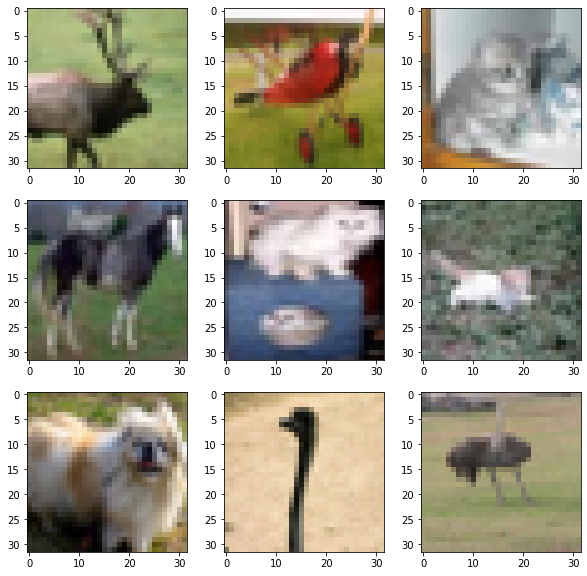

In [9]:
## Lets check the cats and dogs datasets
fig=plt.figure(figsize=(10, 10))
indx =34
n_col=3
n_row=3
for i,pic in enumerate(img_train[indx:indx+9]):
    #print(i, pic)
    fig.add_subplot(n_row, n_col, i+1)
    #img= image.load_img(pic)
    plt.imshow(pic)
    plt.axis(True)

plt.show()

## Step 3. ResNet 50 Model

In [10]:
img_height=32
img_width=32
num_classes=10

In [11]:
base_model = ResNet50(weights=None, include_top=False, input_shape=(img_height, img_width, 3))

In [12]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.1)(x)

In [13]:
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [17]:
from keras.optimizers import SGD, Adam
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit?

In [ ]:
history= model.fit(img_train, label_train, epochs = 20, batch_size = 64, validation_data=(img_test, label_test), validation_steps=100)

Epoch 1/20
428/782 [===============>..............] - ETA: 29:35 - loss: 2.4836 - accuracy: 0.2049

In [ ]:
preds = model.evaluate(img_test, label_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.grid(True)
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.grid(True)
plt.figure()


plt.show()